In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("loanP_train.csv")

In [4]:
df.head(10)

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LI0105,Male,Married,2,Yes,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LI0106,Male,Married,0,No,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LI0107,Male,Married,3+,Yes,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LI0108,Male,Married,2,Yes,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LI0109,Male,Married,1,Yes,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [81]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,599.000000,585.000000,599.000000
mean,5420.687813,1563.913055,145.434256,342.461538,0.771285
std,6169.168633,2456.618360,83.097799,64.868352,0.420356
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2874.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5807.500000,2279.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

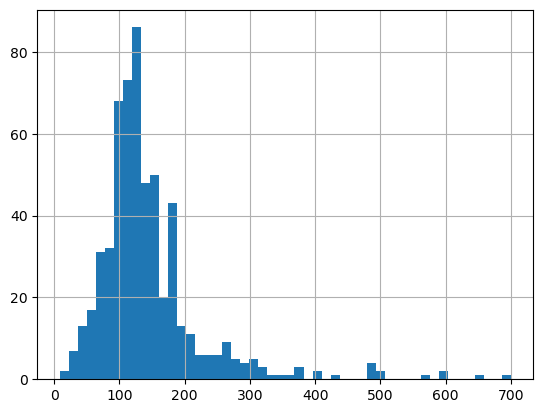

In [6]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

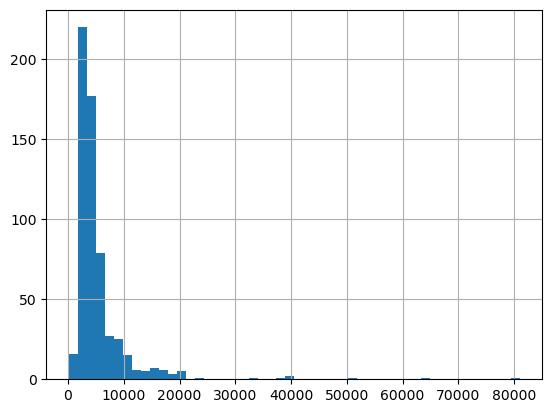

In [7]:
df['ApplicantIncome'].hist(bins=50)

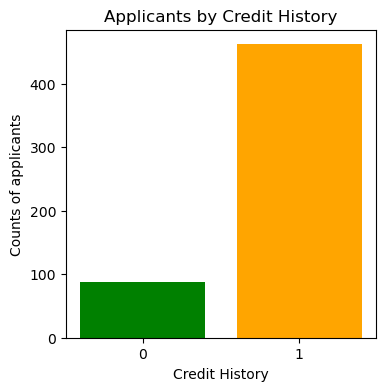

In [8]:
import matplotlib.pyplot as plt
Credit_history_count = df['Credit_History'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(4, 4))  # Set the figure size

# Create the bar chart
plt.bar(Credit_history_count.index, Credit_history_count.values, color=['orange', 'green'])

# Add a title and labels to the plot
plt.title('Applicants by Credit History')  # Title of the plot
plt.xlabel('Credit History')  # X-axis label
plt.xticks([0, 1])
plt.ylabel('Counts of applicants')  # Y-axis label

# Show the plot
plt.show()

In [9]:
df.apply(lambda x: sum(x.isna()), axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(0, inplace=True)

In [36]:
df

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,145.434256,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,LI0694,Male,Married,0,Yes,Yes,16120,0.0,260.000000,360.0,1.0,Urban,Y
595,LI0695,Male,Single,0,No,No,3833,0.0,110.000000,360.0,1.0,Rural,Y
596,LI0696,Male,Married,2,No,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
597,LI0697,Male,Single,NaN,Yes,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N


In [37]:
df.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
df.mean(numeric_only=True)

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.771285
dtype: float64

In [39]:
one = pd.DataFrame(np.random.randn(5,4))
one

,0,1,2,3
0,0.551112,-0.367423,0.166427,1.358163
1,0.099168,1.745695,-0.284378,-0.829858
2,-1.980957,-0.668255,-0.240202,1.102892
3,1.061991,-0.679164,0.675136,-1.262315
4,0.859512,-0.766885,1.833917,1.689547


In [40]:
two = pd.DataFrame(np.random.randn(7,4))
two

,0,1,2,3
0,1.214240,-0.931595,1.153720,-0.152554
1,0.089192,0.992797,-1.160072,0.950984
2,1.537556,-0.279702,1.654048,0.159202
3,0.038975,-1.428251,-0.174612,-0.438934
4,0.596044,-0.859893,-0.040119,-0.903169
5,1.577770,1.061253,-0.363355,0.254955
6,1.171719,-0.191179,1.788617,-0.365021


In [41]:
pd.concat([one, two])

,0,1,2,3
0,0.551112,-0.367423,0.166427,1.358163
1,0.099168,1.745695,-0.284378,-0.829858
2,-1.980957,-0.668255,-0.240202,1.102892
3,1.061991,-0.679164,0.675136,-1.262315
4,0.859512,-0.766885,1.833917,1.689547
0,1.214240,-0.931595,1.153720,-0.152554
1,0.089192,0.992797,-1.160072,0.950984
2,1.537556,-0.279702,1.654048,0.159202
3,0.038975,-1.428251,-0.174612,-0.438934
4,0.596044,-0.859893,-0.040119,-0.903169


In [42]:
pip install graphviz


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [43]:
df

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,145.434256,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,LI0694,Male,Married,0,Yes,Yes,16120,0.0,260.000000,360.0,1.0,Urban,Y
595,LI0695,Male,Single,0,No,No,3833,0.0,110.000000,360.0,1.0,Rural,Y
596,LI0696,Male,Married,2,No,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
597,LI0697,Male,Single,NaN,Yes,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [146]:
X = df.iloc[:, [8,10]].values #Credit History, Loan amount

y = df.iloc[:, [12]].values #Loan status

y = y.ravel()

feature_names = ['Credit_History', 'LoanAmount']

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [193]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [194]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [195]:
#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [196]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 19,  26],
       [  4, 101]], dtype=int64)

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [198]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, pos_label = 'Y')

0.7952755905511811

In [199]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, pos_label = 'N')

0.8260869565217391

In [191]:
results_df = pd.DataFrame(X_test, columns=feature_names)
results_df['Actual'] = y_test
results_df['Predicted'] = y_pred



results_df

,Credit_History,LoanAmount,Actual,Predicted
0,0.003191,0.585618,Y,Y
1,-0.312409,-1.707597,N,N
2,4.402805,0.585618,N,Y
3,2.665621,-1.707597,N,N
4,0.308014,0.585618,N,Y
...,...,...,...,...
175,0.084661,0.585618,Y,Y
176,-0.523353,-1.707597,N,N
177,-0.535761,0.585618,Y,Y
178,0.159112,0.585618,Y,Y
